###Import Statements

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


###Defining the model

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


vgg = VGG16()
model = Sequential()

for i in vgg.layers:
  model.add(i)
  
model.pop()

for i in model.layers:
  i.trainable = False

W0628 05:42:32.529983 140259457697664 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


553467904/553467096 [==============================] - 40s 0us/step


In [0]:
model.add(Dense(125, activation = 'softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

###Training model

In [0]:
train_gen = ImageDataGenerator(
  preprocessing_function = preprocess_input,
  validation_split = 0.1
)

test_gen = ImageDataGenerator(
  preprocessing_function = preprocess_input
)

In [0]:
directory = '/content/gdrive/My Drive/Training_Test/images_train'

train_generator = train_gen.flow_from_directory(
  directory,
  target_size = (224,224),
  color_mode = 'rgb',
  class_mode = 'categorical',
  batch_size = 64,
  subset = 'training'

)


validation_generator = train_gen.flow_from_directory(
  directory,
  target_size = (224,224),
  color_mode = 'rgb',
  class_mode = 'categorical',
  batch_size = 64,
  subset = 'validation'
)

Found 10110 images belonging to 125 classes.
Found 1111 images belonging to 125 classes.


In [0]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = '/content/gdrive/My Drive/models/Sketchy Database models/images_final.h5'

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')

callbacks_list = [checkpoint]

In [0]:
model.fit_generator(

    train_generator,

    steps_per_epoch = train_generator.samples // 64,

    epochs = 20,
    
    validation_data = validation_generator,

    validation_steps = validation_generator.samples // 64,
    
    callbacks = callbacks_list,
    
    workers = 7,
)

Epoch 1/20
156/157 [============================>.] - ETA: 3s - loss: 0.7297 - acc: 0.8351
Epoch 00001: val_acc improved from -inf to 0.89338, saving model to /content/gdrive/My Drive/models/Sketchy Database models/images_final.h5
157/157 [==============================] - 567s 4s/step - loss: 0.7275 - acc: 0.8357 - val_loss: 0.3922 - val_acc: 0.8934
Epoch 2/20
156/157 [============================>.] - ETA: 0s - loss: 0.0648 - acc: 0.9786
Epoch 00002: val_acc improved from 0.89338 to 0.91452, saving model to /content/gdrive/My Drive/models/Sketchy Database models/images_final.h5
157/157 [==============================] - 133s 849ms/step - loss: 0.0646 - acc: 0.9786 - val_loss: 0.3544 - val_acc: 0.9145
Epoch 3/20
156/157 [============================>.] - ETA: 0s - loss: 0.0150 - acc: 0.9969
Epoch 00003: val_acc improved from 0.91452 to 0.91912, saving model to /content/gdrive/My Drive/models/Sketchy Database models/images_final.h5
157/157 [==============================] - 103s 655ms/

###Finetuning

In [0]:
model.load_weights('/content/gdrive/My Drive/models/Sketchy Database models/images_final.h5')

In [0]:
model.compile(loss="categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(lr = 0.00001),	metrics=["accuracy"])

In [0]:
train_generator.reset()
validation_generator.reset()

In [0]:
for i in model.layers:
  i.trainable = True

In [0]:
model.fit_generator(

    train_generator,

    steps_per_epoch = train_generator.samples // 64,

    epochs = 20,
    
    validation_data = validation_generator,

    validation_steps = validation_generator.samples // 64,
    
    callbacks = callbacks_list,
    
    workers = 7,
)

Epoch 1/20
156/157 [============================>.] - ETA: 1s - loss: 0.0262 - acc: 0.9936
Epoch 00001: val_acc did not improve from 0.93290
157/157 [==============================] - 299s 2s/step - loss: 0.0261 - acc: 0.9936 - val_loss: 0.3513 - val_acc: 0.9164
Epoch 2/20
156/157 [============================>.] - ETA: 1s - loss: 0.0148 - acc: 0.9965
Epoch 00002: val_acc did not improve from 0.93290
157/157 [==============================] - 278s 2s/step - loss: 0.0147 - acc: 0.9965 - val_loss: 0.3733 - val_acc: 0.9145
Epoch 3/20
156/157 [============================>.] - ETA: 1s - loss: 0.0033 - acc: 0.9991
Epoch 00003: val_acc did not improve from 0.93290
157/157 [==============================] - 279s 2s/step - loss: 0.0032 - acc: 0.9991 - val_loss: 0.3825 - val_acc: 0.9274
Epoch 4/20
156/157 [============================>.] - ETA: 1s - loss: 0.0033 - acc: 0.9995
Epoch 00004: val_acc did not improve from 0.93290
157/157 [==============================] - 279s 2s/step - loss: 0.0033

###Testing

In [0]:
directory = '/content/gdrive/My Drive/Training_Test/images_test'

test_datagenerator = test_gen.flow_from_directory(
  directory,
  target_size = (224,224),
  color_mode = 'rgb',
  class_mode = 'categorical',
  batch_size = 64,
)

Found 1291 images belonging to 125 classes.


In [0]:
loss, acc = model.evaluate_generator(test_datagenerator)

In [0]:
acc

0.9233153

In [0]:
loss

0.31883938184806276

In [0]:
model2 = Sequential()

for i in vgg.layers:
  model2.add(i)

model2.pop()
model2.add(Dense(125, activation='softmax'))  

In [0]:
model2.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')
model2.load_weights('/content/gdrive/My Drive/models/Sketchy Database models/images_final_finetuned.h5')

In [0]:
loss, acc = model2.evaluate_generator(test_datagenerator)

In [0]:
acc

0.9194423

In [0]:
loss

0.2634259693690443

In [0]:
model.save_weights('/content/gdrive/My Drive/models/Sketchy Database models/images_final_finetuned.h5')

###Feature Extraction of Training Data

In [0]:
model2.pop()
from tensorflow.keras.models import Model




layer_outputs = [layer.output for layer in model2.layers] 
intermediate_layer_model = Model(inputs=model2.input,
                                 outputs=layer_outputs)



In [0]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
l = []
path = '/content/gdrive/My Drive/Training_Test/images_train/'


for i in sorted(os.listdir(path)):
  
  for j in sorted(os.listdir(path+i)):
    data = plt.imread(path+i+'/'+j)
    data = cv2.resize(data, (224,224))
    data = preprocess_input(data)
    data = np.expand_dims(data, axis=0)
    activations = intermediate_layer_model.predict(data)
    l.append(activations[-1])
  print(i)

In [0]:
import numpy as np

In [0]:
ary = np.asarray(l)

In [0]:
np.save('/content/gdrive/My Drive/Training_Test/features/train_images_features.npy',ary)

In [0]:
final = np.squeeze(np.asarray(l))

In [0]:
np.save('/content/gdrive/My Drive/Training_Test/features/train_images_features_final.npy',ary)

In [0]:
final = np.load('/content/gdrive/My Drive/Training_Test/features/train_images_features_final.npy')

path = '/content/gdrive/My Drive/Training_Test/images_train/'

labels = []
count = 0

for i in sorted(os.listdir(path)):
  
  for j in sorted(os.listdir(path+i)):
    labels.append(count)
  count+=1
    
  

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=0).fit_transform(final)

In [0]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(20, 20))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.set_facecolor('w')
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=10)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc

In [0]:
labels = np.asarray(labels)

####Scatter plot of model 1

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f5ced45a4a8>)

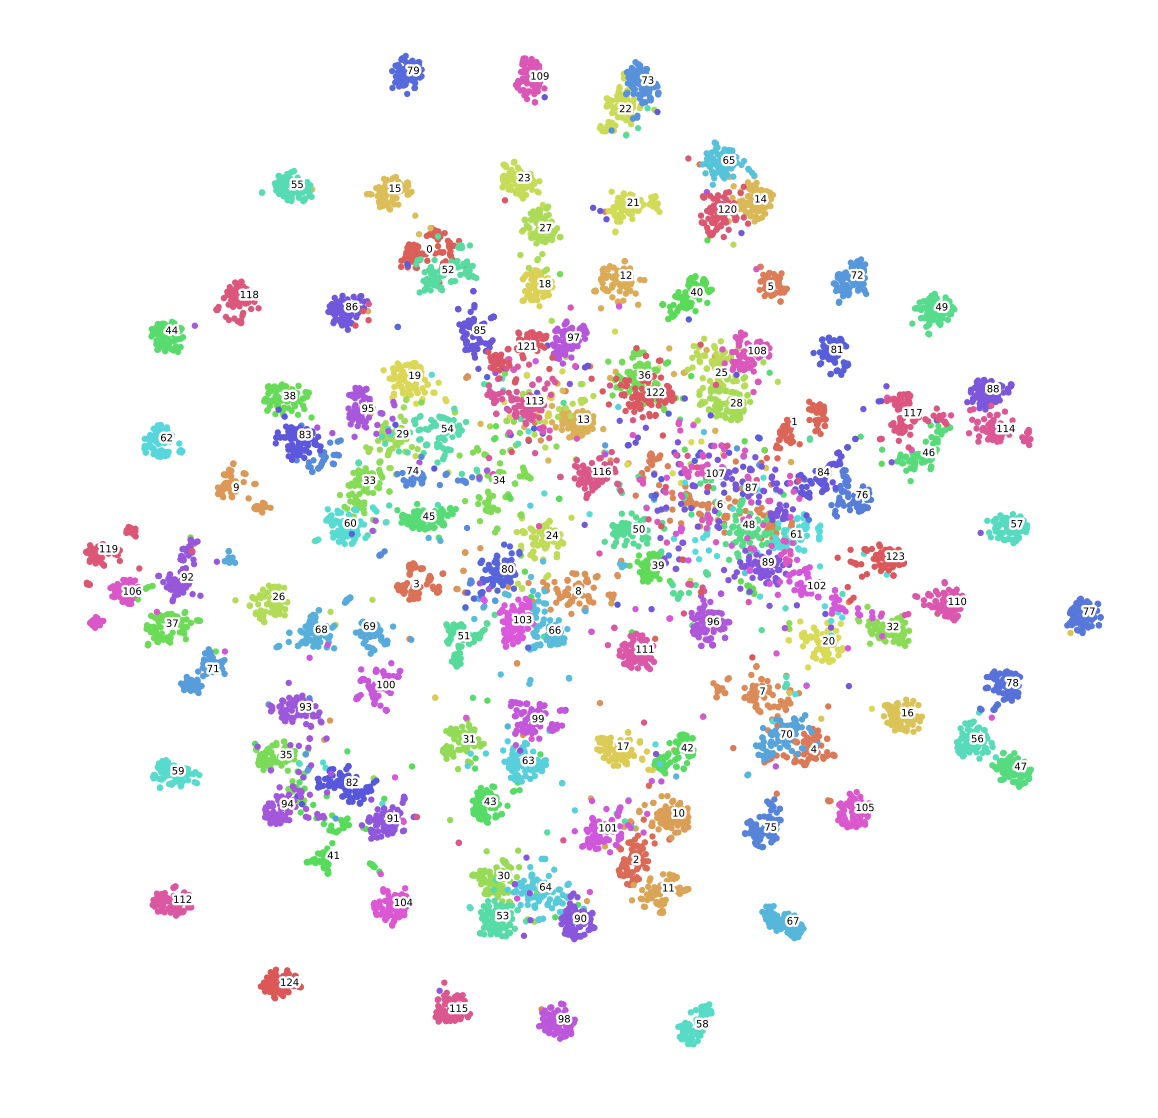

In [0]:
fashion_scatter(tsne, labels) #old model not finetuned

####Scatter plot with multicore tsne 

In [0]:
!pip install MulticoreTSNE


  Stored in directory: /root/.cache/pip/wheels/27/59/53/3b52ee63add3692254c30d687fa4dff4d128d0557861fb028e
Successfully built MulticoreTSNE


In [0]:
import numpy as np

In [0]:
path = '/content/gdrive/My Drive/Training_Test/images_train/'
import os
labels = []
count = 0

for i in sorted(os.listdir(path)):
  4
  for j in sorted(os.listdir(path+i)):
    labels.append(count)
  count+=1
    
  

In [0]:
final = np.load('/content/gdrive/My Drive/Training_Test/features/train_images_features_final.npy')

np.squeeze(final).shape

(11221, 4096)

In [0]:
!pip install tsnecuda

     |████████████████████████████████| 16.1MB 8.2MB/s 


In [0]:
!pip install faiss

     |████████████████████████████████| 4.7MB 9.2MB/s 


In [0]:

from tsnecuda import TSNE

tsne = TSNE(n_jobs=7)
tsne_final = tsne.fit_transform(np.squeeze(final))


In [0]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(20, 20))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.set_facecolor('w')
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=10)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc

In [0]:
labels = np.asarray(labels)

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f34fa6d1588>)

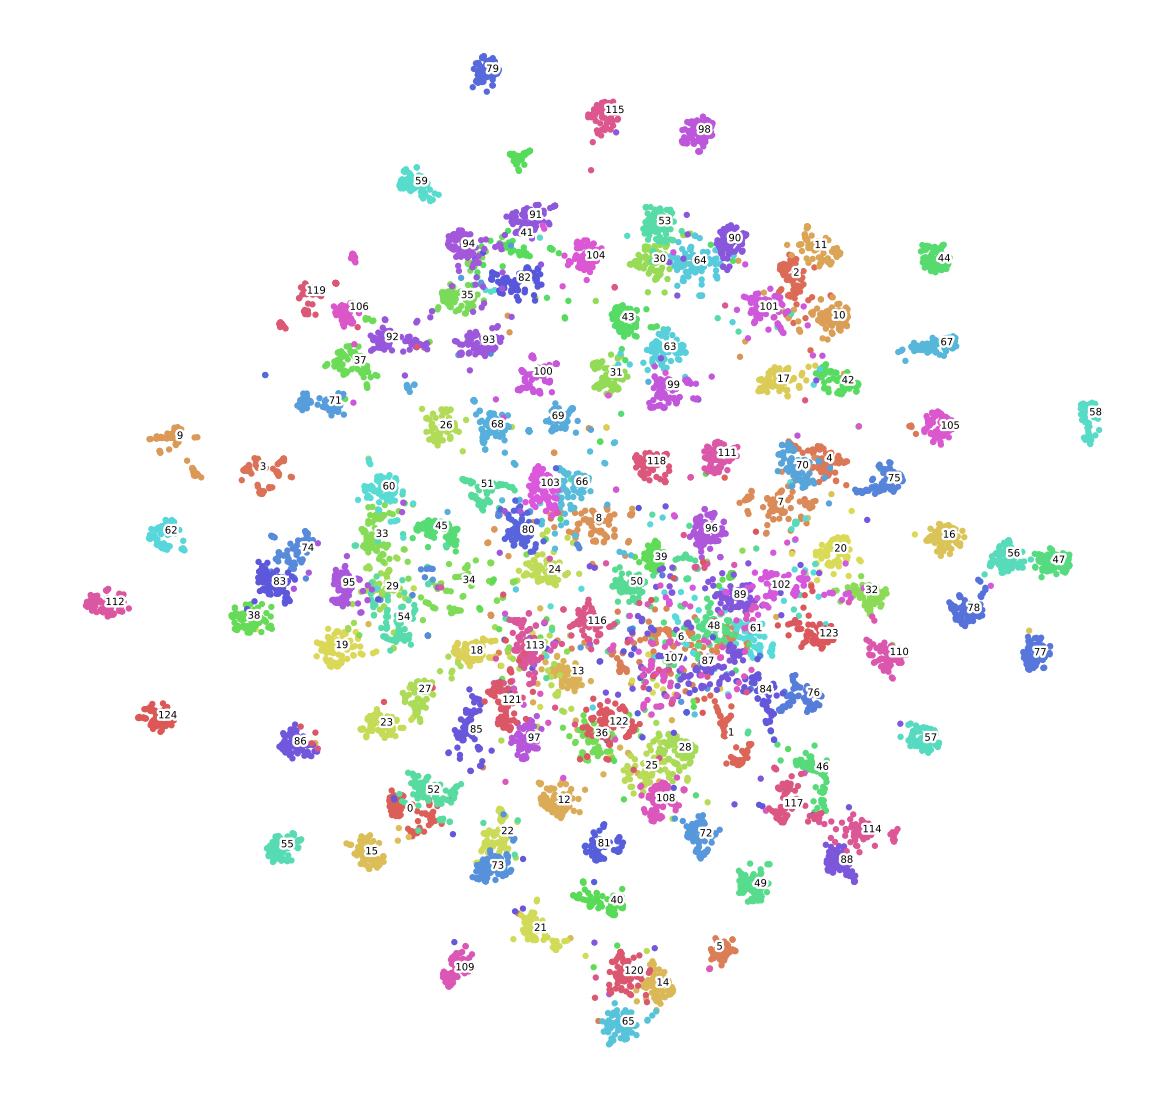

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
fashion_scatter(tsne_final, labels)

###Feature Extraction of Testing Data

In [0]:
model2.pop()
from tensorflow.keras.models import Model




layer_outputs = [layer.output for layer in model2.layers] 
intermediate_layer_model = Model(inputs=model2.input,
                                 outputs=layer_outputs)

In [0]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
l = []
path = '/content/gdrive/My Drive/Training_Test/images_test/'


for i in sorted(os.listdir(path)):
  
  for j in sorted(os.listdir(path+i)):
    data = plt.imread(path+i+'/'+j)
    data = cv2.resize(data, (224,224))
    data = preprocess_input(data)
    data = np.expand_dims(data, axis=0)
    activations = intermediate_layer_model.predict(data)
    l.append(activations[-1])
  print(i)

In [0]:
import numpy as np

In [0]:
final = np.squeeze(np.asarray(l))

In [0]:
np.save('/content/gdrive/My Drive/Training_Test/features/test_images_features.npy',final)

In [0]:
final = np.load('/content/gdrive/My Drive/Training_Test/features/test_images_features.npy')

path = '/content/gdrive/My Drive/Training_Test/images_test/'

labels = []
count = 0

for i in sorted(os.listdir(path)):
  
  for j in sorted(os.listdir(path+i)):
    labels.append(count)
  count+=1
    
  

In [0]:
labels = np.asarray(labels)

In [0]:
final.shape

(1291, 4096)

In [0]:
from openTSNE import TSNE
tsne = TSNE(random_state=0).fit(final)

In [0]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(20, 20))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.set_facecolor('w')
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=10)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7f8e23d7c860>)

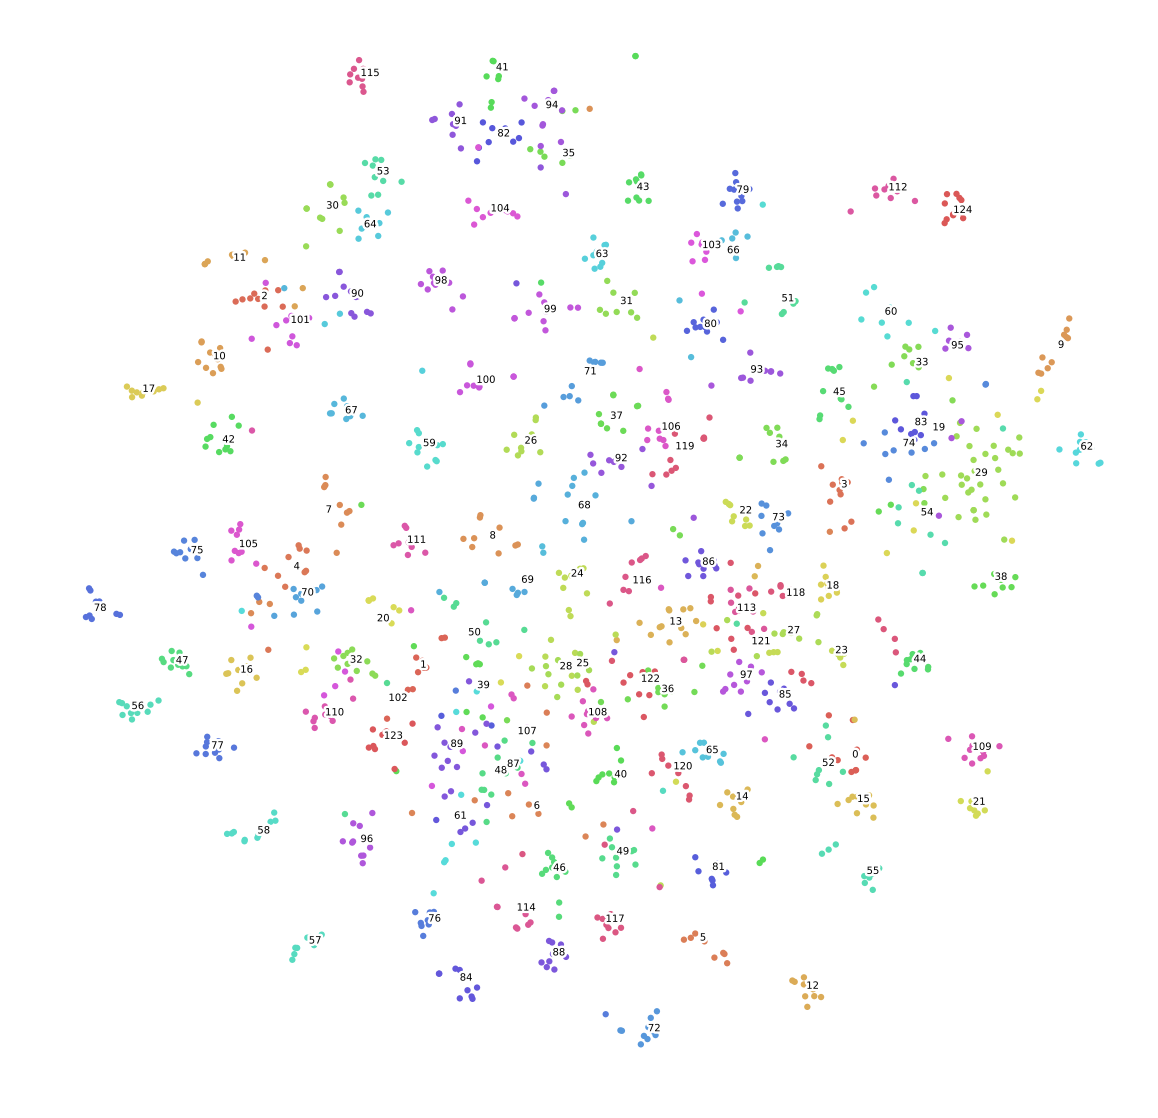

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
fashion_scatter(tsne, labels)